In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank_loan_data.csv')
df1 = df.copy()

In [4]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Number of Open Accounts,...,repaid_3rd_party,due_3rd_party,loans_held,first_repayment_date,last_repayment_date,agreement_signing_date,board_approval_date,effective_date_most_recent_,closed_date_most_recent_,last_disbursement_date
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,871112.0,2 years,Rent,Debt Consolidation,8391.73,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,99999999.0,Short Term,871112.0,2 years,Rent,Debt Consolidation,8391.73,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Loan Status', 'Loan_ID', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'end_of_period', 'loan_number', 'region', 'country_code',
       'country', 'guarantor_country_code', 'guarantor', 'loan_type',
       'loan_status', 'interest_rate', 'currency_of_commitment', 'project_id',
       'project_name_', 'undisbursed_amount', 'disbursed_amount',
       'repaid_to_ibrd', 'due_to_ibrd', 'exchange_adjustment',
       'borrower_s_obligation', 'sold_3rd_party', 'repaid_3rd_party',
       'due_3rd_party', 'loans_held', 'first_repayment_date

In [6]:
# Finding null values in every column
null_values = df.isnull().sum()

# Printing the null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
Loan ID                        867614
Customer ID                    867614
Current Loan Amount            867614
Term                           867614
Annual Income                  888749
Years in current job           872263
Home Ownership                 867614
Purpose                        867614
Monthly Debt                   867614
Number of Open Accounts        867614
Number of Credit Problems      867614
Current Credit Balance         867614
Maximum Open Credit            867616
Bankruptcies                   867840
Loan Status                    877614
Loan_ID                        977000
Gender                         977013
Married                        977003
Dependents                     977015
Education                      977000
Self_Employed                  977032
ApplicantIncome                977000
CoapplicantIncome              977000
LoanAmount                     977022
Loan_Amount_Term               977014
Credit_History        

In [7]:
def print_dataset_info(df):
    # Total number of rows and columns
    total_rows = df.shape[0]
    total_columns = df.shape[1]

    # Null values in each column
    null_values = df.isnull().sum()

    # Columns with all null values
    all_null_columns = null_values[null_values == total_rows].index.tolist()
    num_all_null_columns = len(all_null_columns)

    # Columns with most null values
    max_null_columns = null_values[null_values == null_values.max()].index.tolist()
    max_null_count = null_values.max()

    # Printing the information
    print("Total rows in the dataset:", total_rows)
    print("Total columns in the dataset:", total_columns)
    print("Columns with all null values:", num_all_null_columns)
    if num_all_null_columns > 0:
        print("Columns with all null values:", all_null_columns)
    print("Columns with the most null values (Count:", max_null_count, "):", max_null_columns)

# Usage example:
print_dataset_info(df)

Total rows in the dataset: 977614
Total columns in the dataset: 58
Columns with all null values: 2
Columns with all null values: ['currency_of_commitment', 'last_disbursement_date']
Columns with the most null values (Count: 977614 ): ['currency_of_commitment', 'last_disbursement_date']


In [8]:
null_percentage = df.isnull().mean()
print(null_percentage)

Loan ID                        0.887481
Customer ID                    0.887481
Current Loan Amount            0.887481
Term                           0.887481
Annual Income                  0.909100
Years in current job           0.892237
Home Ownership                 0.887481
Purpose                        0.887481
Monthly Debt                   0.887481
Number of Open Accounts        0.887481
Number of Credit Problems      0.887481
Current Credit Balance         0.887481
Maximum Open Credit            0.887483
Bankruptcies                   0.887712
Loan Status                    0.897710
Loan_ID                        0.999372
Gender                         0.999385
Married                        0.999375
Dependents                     0.999387
Education                      0.999372
Self_Employed                  0.999405
ApplicantIncome                0.999372
CoapplicantIncome              0.999372
LoanAmount                     0.999394
Loan_Amount_Term               0.999386


In [9]:
def delete_columns(df, column_to_delete):
    df.drop(columns=column_to_delete, inplace=True)

# Assuming your DataFrame is named 'df'
columns_to_drop = ['Years in current job', 'Number of Open Accounts', 'loan_type', 'loan_status', 
                   'interest_rate', 'Number of Credit Problems', 'Bankruptcies', 
                   'Maximum Open Credit', 'board_approval_date', 'Loan Status', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area',
                   'country_code', 'guarantor_country_code', 'guarantor', 'currency_of_commitment', 'project_id', 'project_name_',
                   'repaid_to_ibrd', 'exchange_adjustment', 'borrower_s_obligation', 'sold_3rd_party', 'repaid_3rd_party', 'due_3rd_party',
                   'loans_held', 'effective_date_most_recent_', 'closed_date_most_recent_',
                   'Loan ID', 'Customer ID','end_of_period','loan_number', 'due_to_ibrd', 'last_disbursement_date']

delete_columns(df, columns_to_drop)


In [10]:
df.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Home Ownership',
       'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Loan_ID',
       'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Loan_Status',
       'region', 'country', 'undisbursed_amount', 'disbursed_amount',
       'first_repayment_date', 'last_repayment_date',
       'agreement_signing_date'],
      dtype='object')

In [11]:
df.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Home Ownership',
       'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Loan_ID',
       'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Loan_Status',
       'region', 'country', 'undisbursed_amount', 'disbursed_amount',
       'first_repayment_date', 'last_repayment_date',
       'agreement_signing_date'],
      dtype='object')

# WORKING WITH OUTLIERS

# VISUALIZING THE DATA THAT IF THEY ARE NORMALLY DISTRIBUTED OR NOT

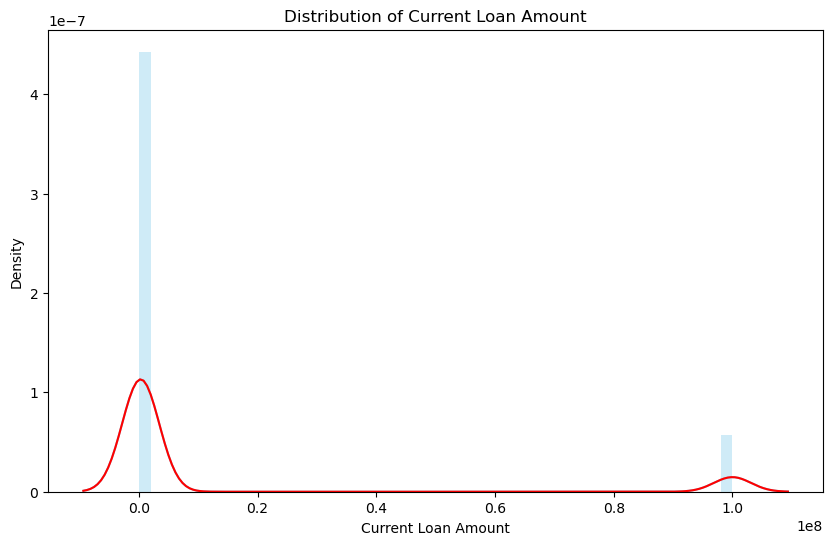

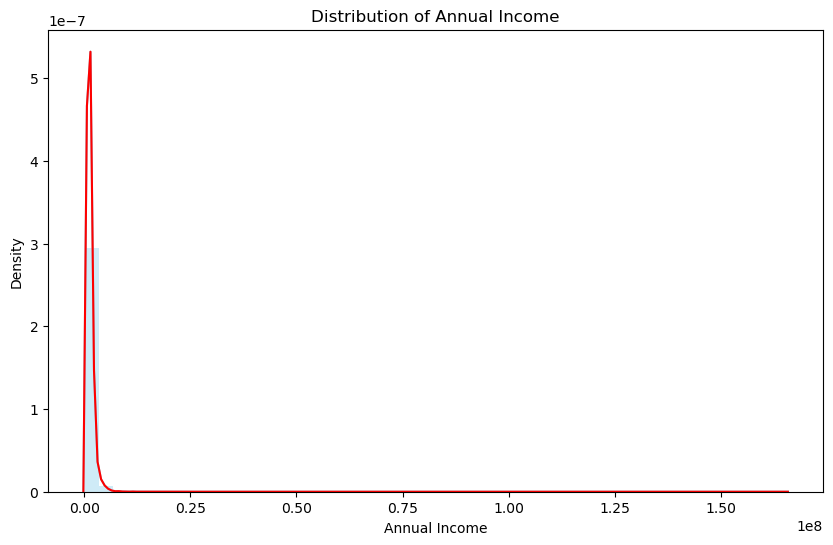

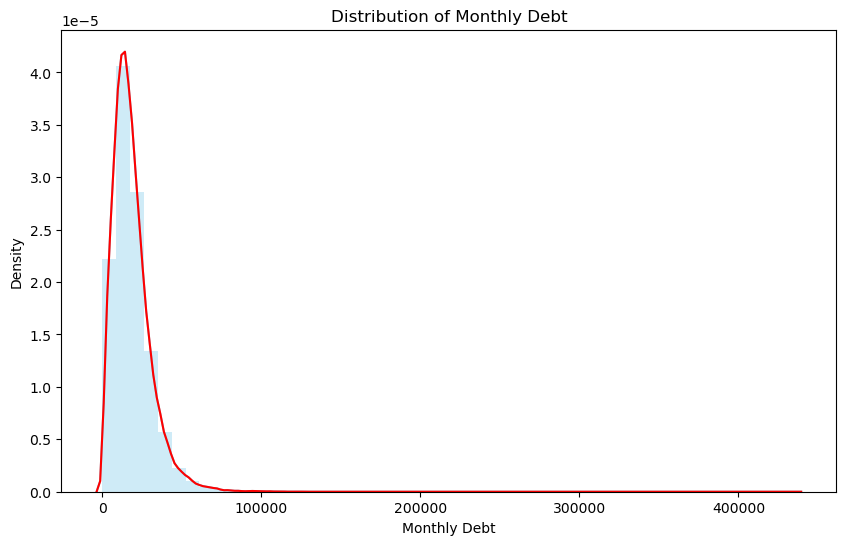

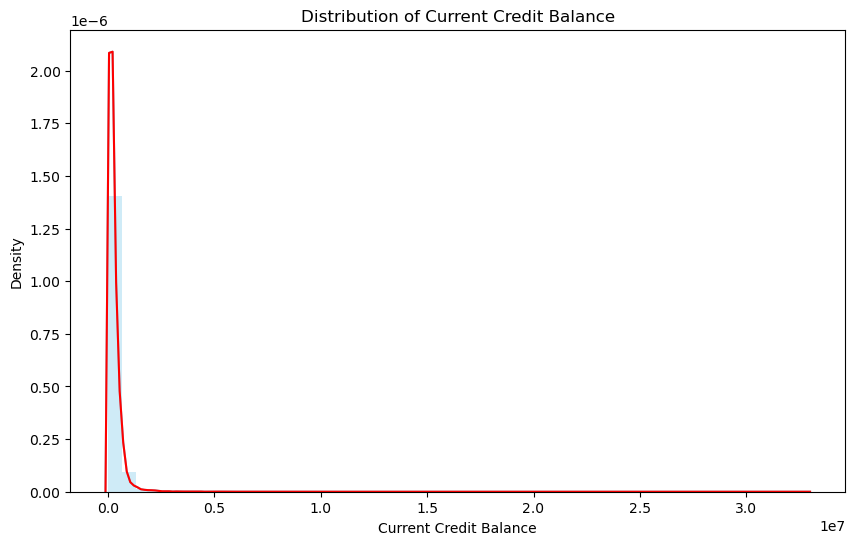

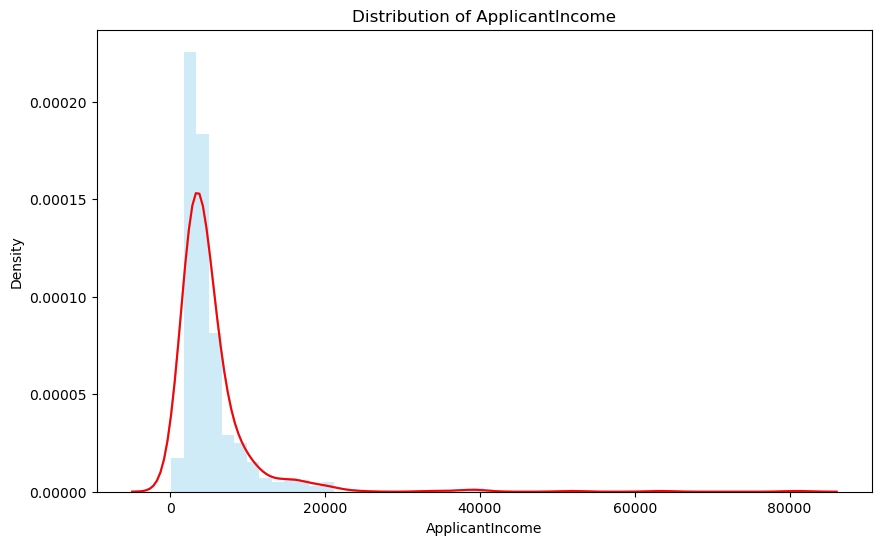

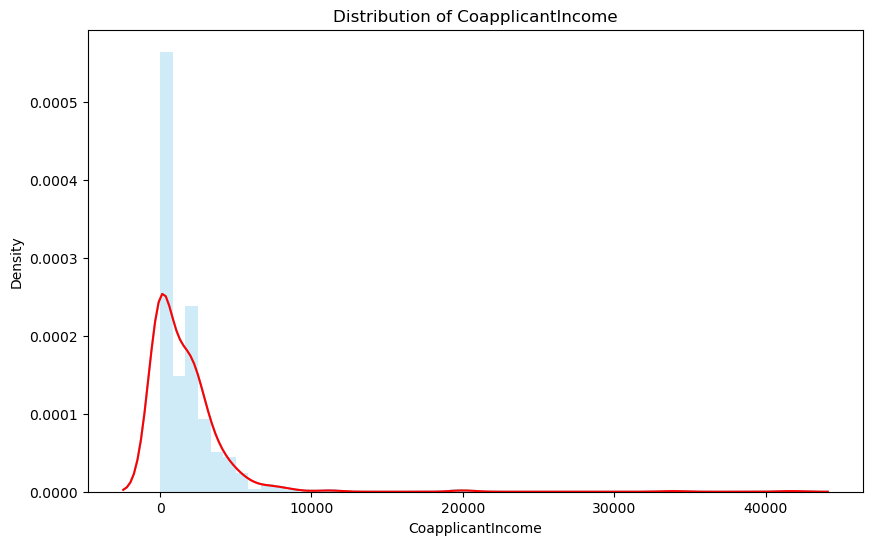

In [12]:
def visualize_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10,6))
        sns.distplot(df[column], kde=True, color='skyblue')
        sns.kdeplot(df[column], color='red')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()
        
columns_of_interest = ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 
                       'Current Credit Balance', 'ApplicantIncome', 'CoapplicantIncome']
visualize_outliers(df, columns_of_interest)

In [13]:
for col in df.columns:
    print(col)

Current Loan Amount
Term
Annual Income
Home Ownership
Purpose
Monthly Debt
Current Credit Balance
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
Credit_History
Loan_Status
region
country
undisbursed_amount
disbursed_amount
first_repayment_date
last_repayment_date
agreement_signing_date


# Calculating Outliers 

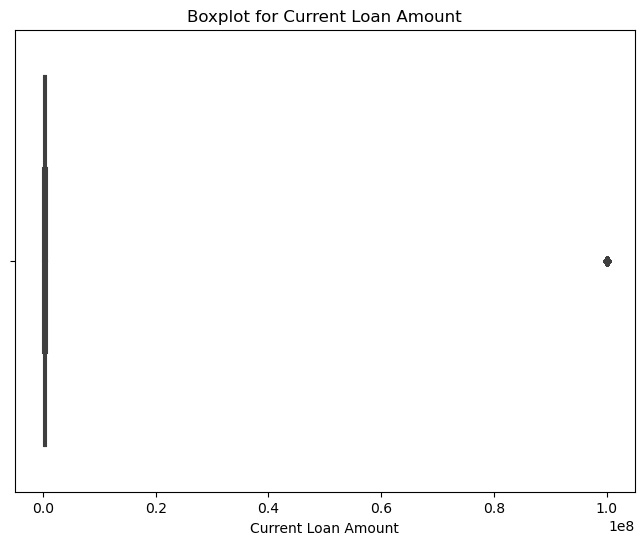

Outliers in Current Loan Amount:
3         99999999.0
24        99999999.0
25        99999999.0
28        99999999.0
81        99999999.0
             ...    
976959    99999999.0
976978    99999999.0
976995    99999999.0
976996    99999999.0
976999    99999999.0
Name: Current Loan Amount, Length: 12617, dtype: float64
--------------------------------------------------


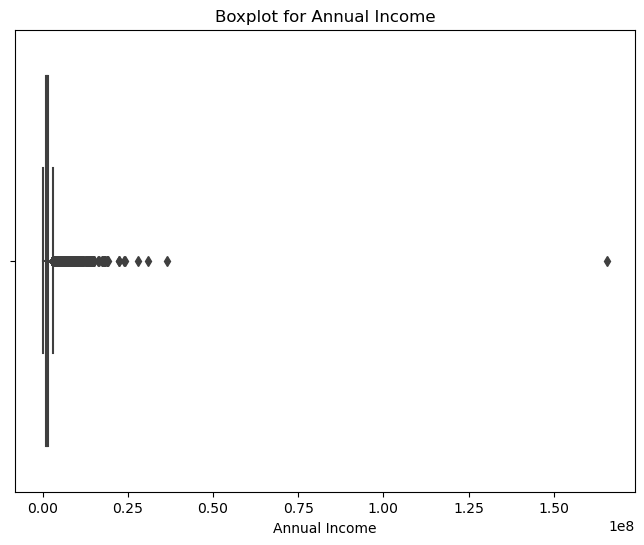

Outliers in Annual Income:
43        5951484.0
73        4872778.0
98        3503106.0
99        3783660.0
105       5048110.0
            ...    
976902    8152729.0
976922    3250026.0
976943    3839520.0
976959    3553323.0
976989    3838380.0
Name: Annual Income, Length: 4158, dtype: float64
--------------------------------------------------


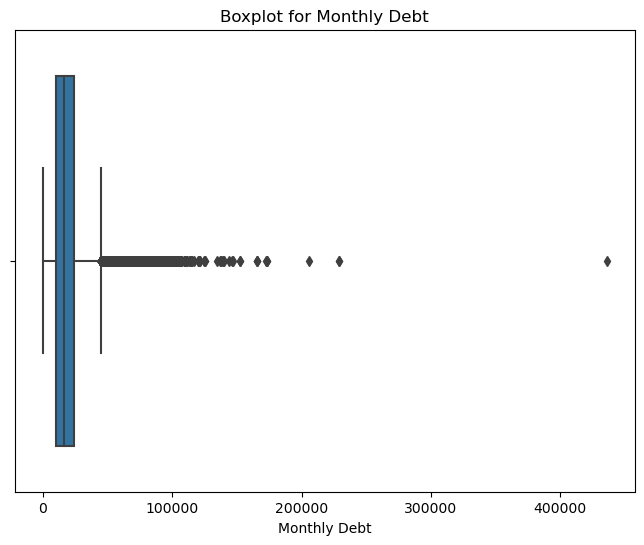

Outliers in Monthly Debt:
43        61498.63
71        45666.12
101       46469.82
104       50060.44
105       50060.44
            ...   
976930    46417.00
976935    47260.03
976943    61112.36
976989    48939.44
976992    51648.08
Name: Monthly Debt, Length: 3733, dtype: float64
--------------------------------------------------


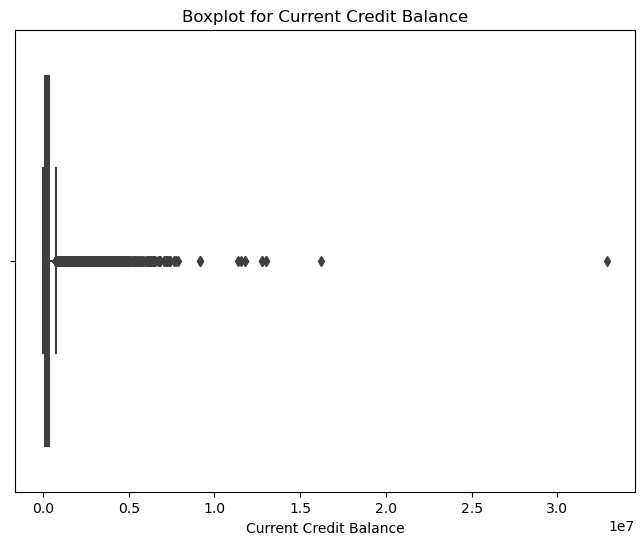

Outliers in Current Credit Balance:
34         827051.0
101       1137036.0
127        763857.0
128        786942.0
129        786942.0
            ...    
976912     788614.0
976959     988874.0
976984    2163891.0
976990     804175.0
976991     850820.0
Name: Current Credit Balance, Length: 5703, dtype: float64
--------------------------------------------------


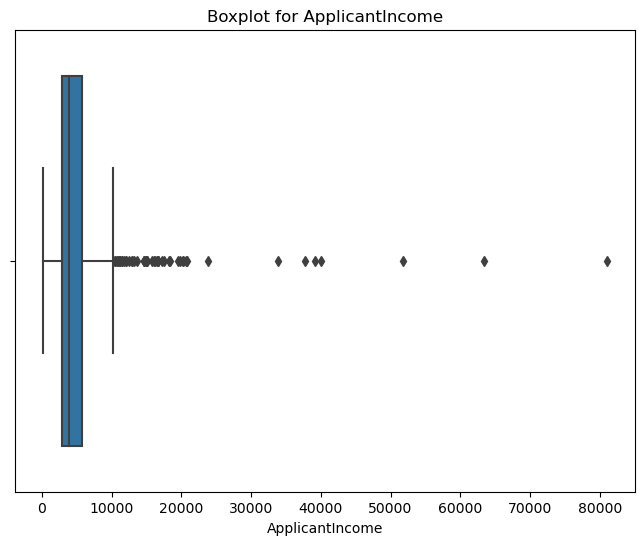

Outliers in ApplicantIncome:
977009    12841.0
977034    12500.0
977054    11500.0
977067    10750.0
977102    13650.0
977106    11417.0
977115    14583.0
977119    10408.0
977126    23803.0
977128    10513.0
977130    20166.0
977138    14999.0
977144    11757.0
977146    14866.0
977155    39999.0
977171    51763.0
977183    33846.0
977185    39147.0
977191    12000.0
977199    11000.0
977254    16250.0
977258    14683.0
977271    11146.0
977278    14583.0
977284    20667.0
977308    20233.0
977324    15000.0
977333    63337.0
977369    19730.0
977370    15759.0
977409    81000.0
977424    14880.0
977432    12876.0
977438    10416.0
977443    37719.0
977467    16692.0
977475    16525.0
977478    16667.0
977483    10833.0
977487    18333.0
977493    17263.0
977506    20833.0
977509    13262.0
977525    17500.0
977533    11250.0
977534    18165.0
977561    19484.0
977572    16666.0
977594    16120.0
977604    12000.0
Name: ApplicantIncome, dtype: float64
---------------------------------

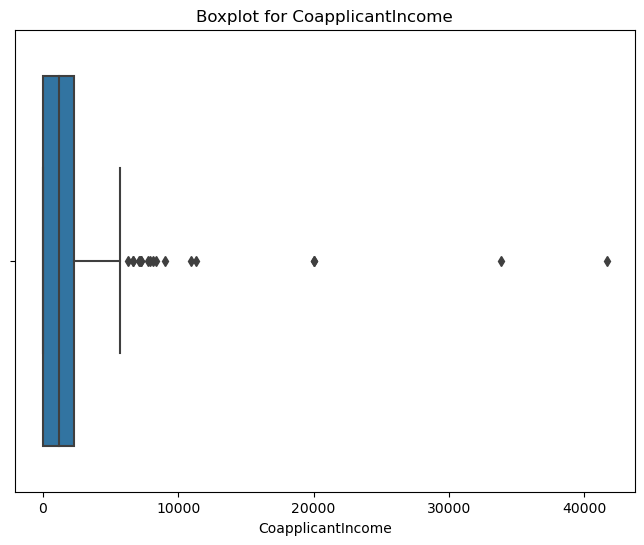

Outliers in CoapplicantIncome:
977009    10968.0
977012     8106.0
977038     7210.0
977122     8980.0
977135     7750.0
977177    11300.0
977180     7250.0
977253     7101.0
977349     6250.0
977372     7873.0
977402    20000.0
977417    20000.0
977444     8333.0
977506     6667.0
977513     6666.0
977523     7166.0
977581    33837.0
977600    41667.0
Name: CoapplicantIncome, dtype: float64
--------------------------------------------------


In [14]:
def detect_outliers_and_visualize(df, columns):
    # Iterate over each column
    for column in columns:
        if df[column].dtype != 'object':  # Check if the column is numeric
            # Calculate first and third quartiles
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            # Interquartile range
            iqr = q3 - q1
            # Outlier step
            outlier_step = 1.5 * iqr
            # Determine outliers
            outliers = df[(df[column] < q1 - outlier_step) | (df[column] > q3 + outlier_step)][column]
            
            # Create boxplot
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Boxplot for {column}')
            plt.show()
            
            # Print outliers
            if len(outliers) > 0:
                print(f"Outliers in {column}:")
                print(outliers)
            else:
                print(f"No outliers found in {column}")
            print("-" * 50)

# Example usage:
detect_outliers_and_visualize(df, ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'ApplicantIncome', 'CoapplicantIncome'])


In [15]:
# def trim_outliers(df):
#     # Define the threshold for outliers (e.g., 99th percentile)
#     threshold = 0.99

#     # Trim outliers for each column
#     columns_to_trim = ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 
#                        'Current Credit Balance', 'ApplicantIncome', 'CoapplicantIncome']

#     for column in columns_to_trim:
#         # Calculate the threshold value for the column
#         max_value = df[column].quantile(threshold)

#         # Trim outliers by replacing values beyond the threshold with NaN
#         df[column] = df[column].apply(lambda x: x if x <= max_value else None)
    
#     # Drop rows with NaN values resulting from trimming outliers
#     df = df.dropna()

#     return df

# # Apply trimming to your dataframe
# trimmed_df = trim_outliers(df)

# Handling Missing Values by using Simple Imputer Library

In [16]:
import pandas as pd

# Define the function to fill missing values
def fill_missing_values(df):
    # Fill missing values in numerical columns with mean
    numerical_columns = df.select_dtypes(include=['number']).columns
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    
    # Fill missing values in categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
    
    return df

# Assuming your DataFrame is named 'data'
df = fill_missing_values(df)

In [19]:
df.isnull().sum()

Current Loan Amount             0
Term                            0
Annual Income                   0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Current Credit Balance          0
Loan_ID                         0
Gender                          0
Married                         0
Dependents                      0
Education                       0
Self_Employed                   0
ApplicantIncome                 0
CoapplicantIncome               0
Credit_History                  0
Loan_Status                     0
region                          0
country                         0
undisbursed_amount              0
disbursed_amount                0
first_repayment_date            0
last_repayment_date             0
agreement_signing_date          0
first_repayment_date_year       0
first_repayment_date_month      0
first_repayment_date_week       0
first_repayment_date_day        0
last_repayment_date_year        0
last_repayment

# Fetching the date columns and converting their data types

In [17]:
def extract_date_features(df, date_columns):
    for column in date_columns:
        # Convert the column to datetime if it's not already
        df[column] = pd.to_datetime(df[column])
        
        # Extract year, month, week, and day
        df[column + '_year'] = df[column].dt.year
        df[column + '_month'] = df[column].dt.month
        df[column + '_week'] = df[column].dt.isocalendar().week
        df[column + '_day'] = df[column].dt.day
        
    return df

# Example usage:
date_columns = ['first_repayment_date', 'last_repayment_date', 'agreement_signing_date']
df = extract_date_features(df, date_columns)

In [20]:
df.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Home Ownership',
       'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Loan_ID',
       'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Loan_Status',
       'region', 'country', 'undisbursed_amount', 'disbursed_amount',
       'first_repayment_date', 'last_repayment_date', 'agreement_signing_date',
       'first_repayment_date_year', 'first_repayment_date_month',
       'first_repayment_date_week', 'first_repayment_date_day',
       'last_repayment_date_year', 'last_repayment_date_month',
       'last_repayment_date_week', 'last_repayment_date_day',
       'agreement_signing_date_year', 'agreement_signing_date_month',
       'agreement_signing_date_week', 'agreement_signing_date_day'],
      dtype='object')

# Loan Amount Distribution Analysis

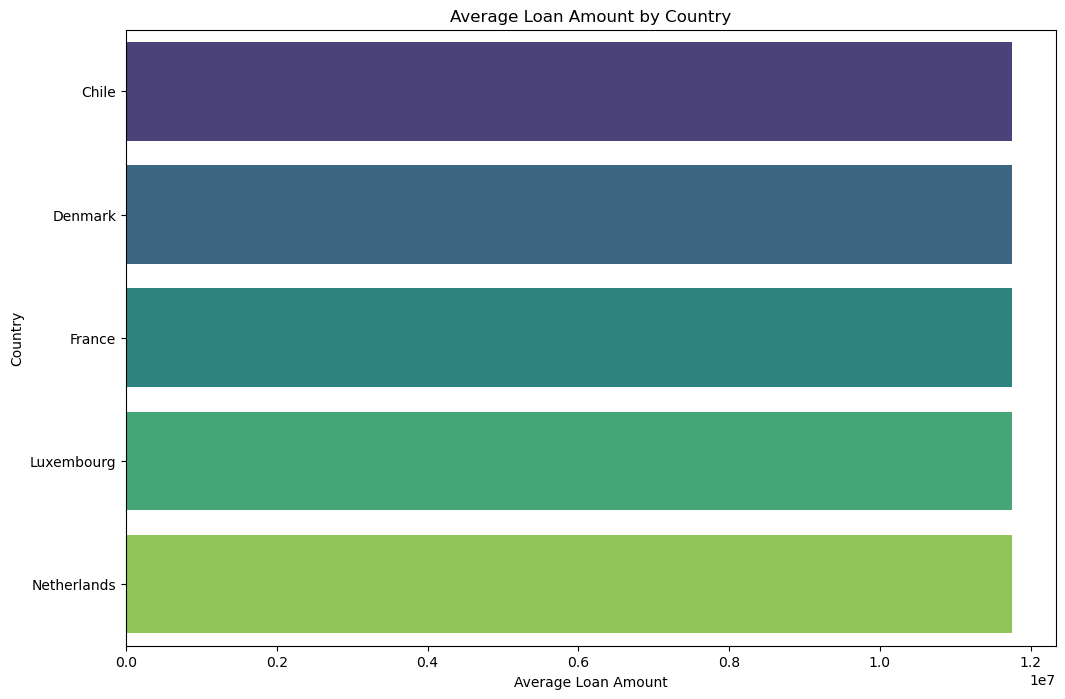

In [21]:
# Group the data by country and calculate the mean loan amount for each country
loan_amount_by_country = df.groupby('country')['Current Loan Amount'].mean().reset_index()

# Sort the data by loan amount in descending order
loan_amount_by_country = loan_amount_by_country.sort_values(by='Current Loan Amount', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=loan_amount_by_country, x='Current Loan Amount', y='country', palette='viridis')
plt.title('Average Loan Amount by Country')
plt.xlabel('Average Loan Amount')
plt.ylabel('Country')
plt.show()

# Loan Term Analysis

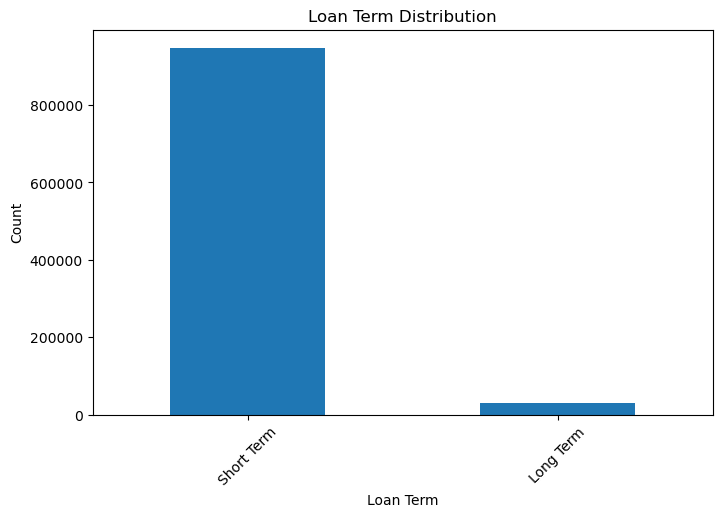

In [23]:
plt.figure(figsize=(8, 5))
df['Term'].value_counts().plot(kind='bar')
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

People who have taken short term or long term loans by gender.

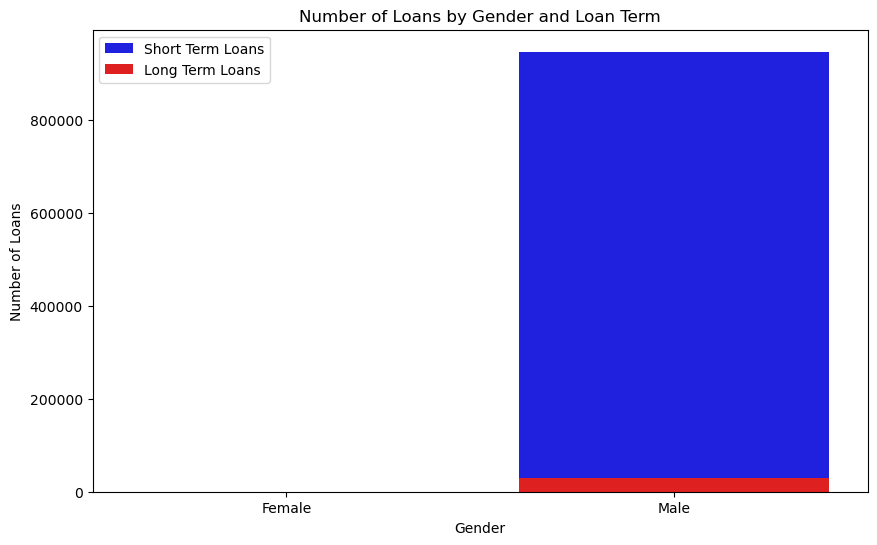

In [24]:
# Filter the data for only short and long-term loans

short_term_loans = df[df['Term'] == 'Short Term']
long_term_loans = df[df['Term'] == 'Long Term']

# Group the data by gender and count the number of loans for each gender
short_term_counts = short_term_loans.groupby('Gender').size().reset_index(name='Short Term Loans')
long_term_counts = long_term_loans.groupby('Gender').size().reset_index(name='Long Term Loans')

# Merge the counts into a single dataframe
loan_counts = short_term_counts.merge(long_term_counts, on='Gender', how='outer').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_counts, x='Gender', y='Short Term Loans', color='blue', label='Short Term Loans')
sns.barplot(data=loan_counts, x='Gender', y='Long Term Loans', color='red', label='Long Term Loans')
plt.title('Number of Loans by Gender and Loan Term')
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.legend()
plt.show()

Males have taken more loans than female

# Debt Distribution Analysis

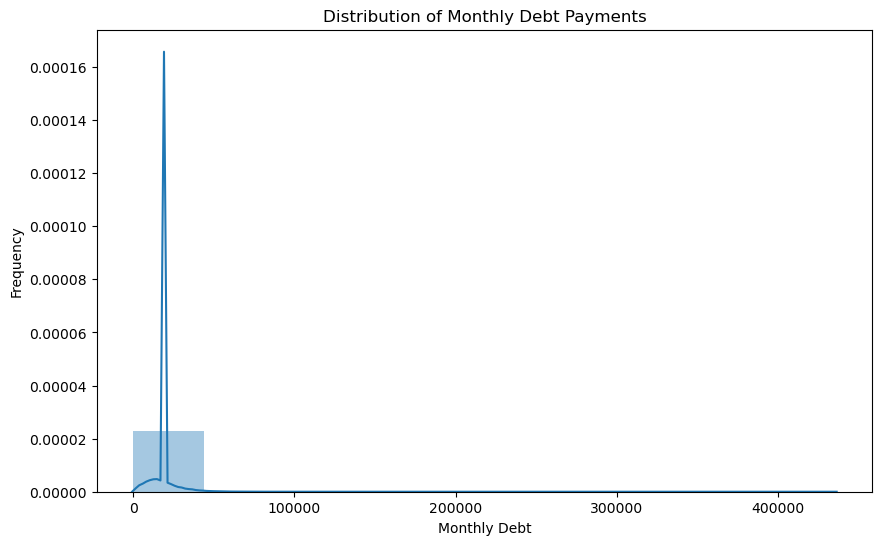

In [27]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Monthly Debt'], bins=10, kde=True)
plt.title('Distribution of Monthly Debt Payments')
plt.xlabel('Monthly Debt')
plt.ylabel('Frequency')
plt.show()

# Loan Approval Rate Analysis

In [28]:
approval_rate = df['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval Rate:")
print(approval_rate)

Loan Approval Rate:
Y    99.98036
N     0.01964
Name: Loan_Status, dtype: float64


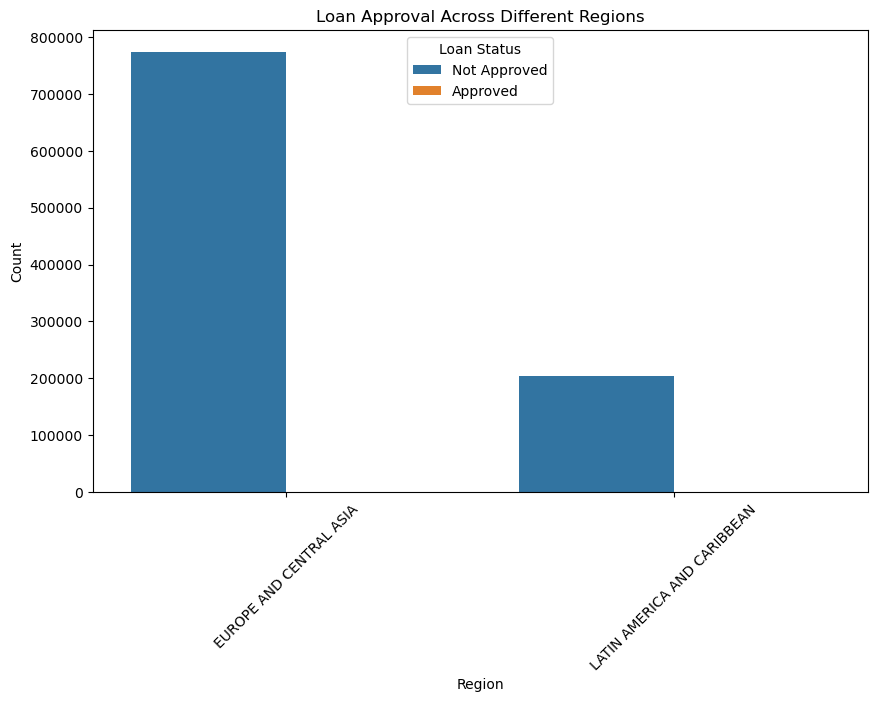

In [29]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='Loan_Status')
plt.title('Loan Approval Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Marital Status Analysis

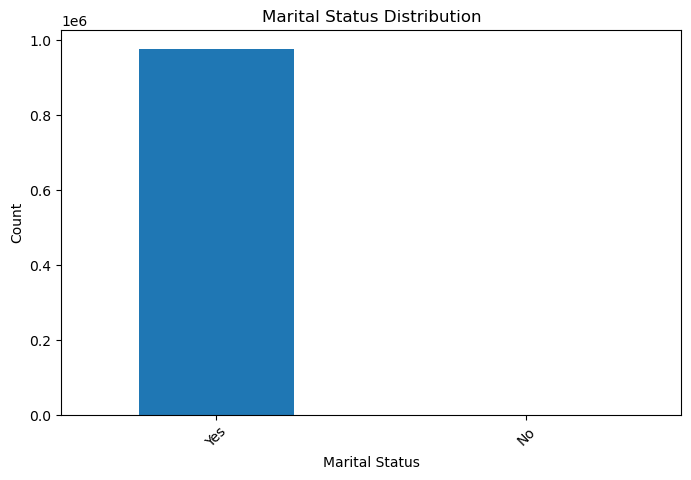

In [31]:
plt.figure(figsize=(8, 5))
df['Married'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
df['Married'].value_counts()

Yes    977401
No        213
Name: Married, dtype: int64

977401 are Married meanwhile 213 are unmarried 

# Education Level Analysis by Country and Gender

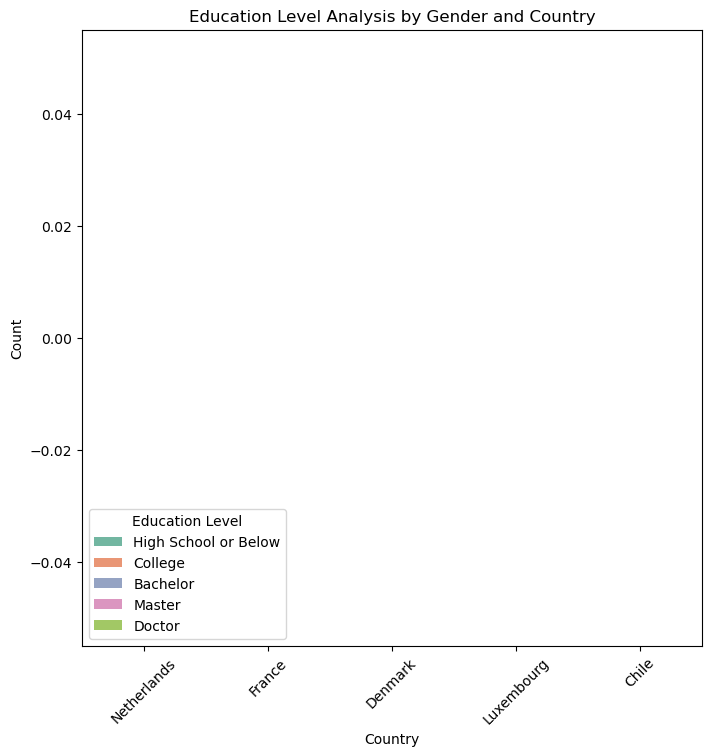

In [34]:
# Create a stacked bar plot
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='country', hue='Education', hue_order=['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'], palette='Set2')
plt.title('Education Level Analysis by Gender and Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [36]:
# Group by 'Education', 'Gender', and 'Country', and count the number of occurrences
education_analysis = df.groupby(['Education', 'Gender', 'country']).size().reset_index(name='Count')

# Display the education level analysis by gender and country
education_analysis

,Education,Gender,country,Count
0,Graduate,Female,Netherlands,92
1,Graduate,Male,Chile,203745
2,Graduate,Male,Denmark,132651
3,Graduate,Male,France,132651
4,Graduate,Male,Luxembourg,132651
5,Graduate,Male,Netherlands,375690
6,Not Graduate,Female,Netherlands,20
7,Not Graduate,Male,Netherlands,114


# Loan Disbursement Analysis

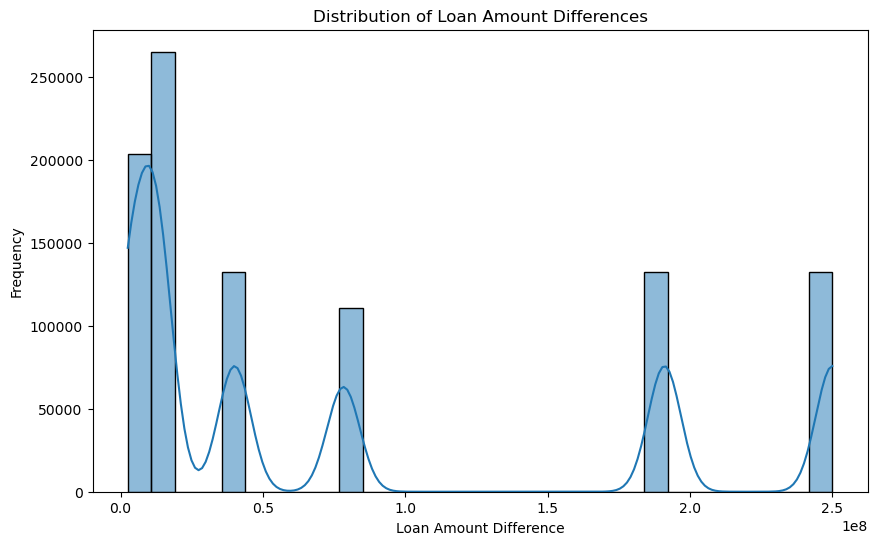

In [38]:
# 1. Difference Between Disbursed and Undisbursed Loan Amounts
df['Loan_Amount_Difference'] = df['disbursed_amount'] - df['undisbursed_amount']

# Summary statistics for the loan amount difference
loan_amount_diff_stats = df['Loan_Amount_Difference'].describe()

# Visualize the distribution of loan amount differences (optional)

plt.figure(figsize=(10, 6))
sns.histplot(df['Loan_Amount_Difference'], bins=30, kde=True)
plt.title('Distribution of Loan Amount Differences')
plt.xlabel('Loan Amount Difference')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Summary statistics for disbursed loan amounts
disbursed_loan_amount_stats = df[df['disbursed_amount'].notna()]['disbursed_amount'].describe()

# Summary statistics for undisbursed loan amounts
undisbursed_loan_amount_stats = df[df['undisbursed_amount'].notna()]['undisbursed_amount'].describe()

print("Summary Statistics for Disbursed Loan Amounts:")
print(disbursed_loan_amount_stats)
print("\nSummary Statistics for Undisbursed Loan Amounts:")
print(undisbursed_loan_amount_stats)

Summary Statistics for Disbursed Loan Amounts:
count    9.776140e+05
mean     7.827508e+07
std      9.089735e+07
min      2.500000e+06
25%      1.176198e+07
50%      4.000000e+07
75%      1.910442e+08
max      2.500000e+08
Name: disbursed_amount, dtype: float64

Summary Statistics for Undisbursed Loan Amounts:
count    977614.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: undisbursed_amount, dtype: float64


# Employement Status Analysis

In [41]:
# Calculate loan approval rates based on employment status
approval_rates = df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack()['Y']

# Print approval rates
print(approval_rates)

Self_Employed
No     0.999830
Yes    0.682927
Name: Y, dtype: float64


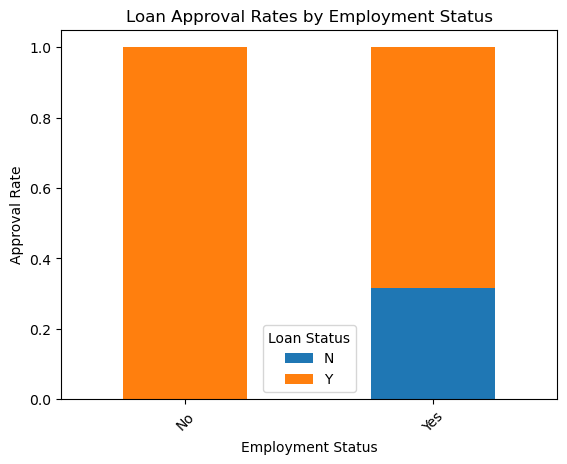

In [42]:
approval_rates = df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack()

# Plot approval rates
approval_rates.plot(kind='bar', stacked=True)
plt.title('Loan Approval Rates by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


# Marital Status

Distribution of Marital Status among Loan Applicants:
Yes    99.978212
No      0.021788
Name: Married, dtype: float64

Statistics based on Marital Status:
  Married  Current Loan Amount  Approval Rate
0      No         1.174621e+07      62.910798
1     Yes         1.174621e+07      99.988439



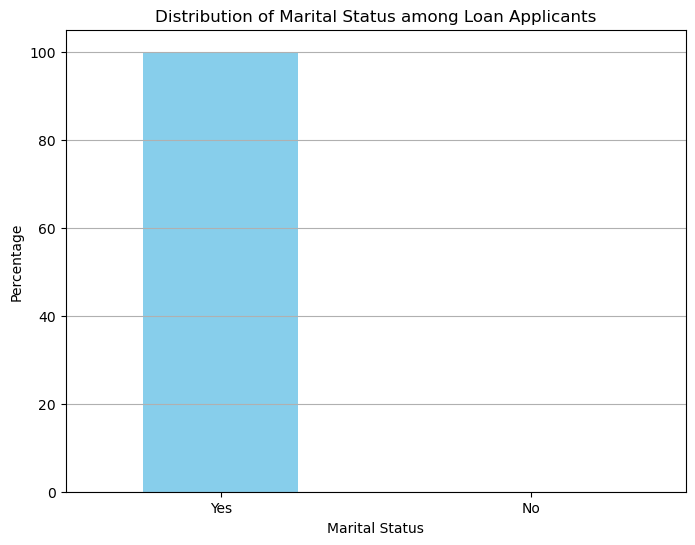

In [45]:
# 1. Calculate the distribution of marital status
marital_status_distribution = df['Married'].value_counts(normalize=True) * 100

print("Distribution of Marital Status among Loan Applicants:")
print(marital_status_distribution)
print()

# 2. Compute statistics based on marital status
marital_status_stats = df.groupby('Married').agg({
    'Current Loan Amount': 'mean',  # Mean loan amount
    'Loan_Status': lambda x: x.value_counts(normalize=True)['Y'] * 100  # Approval rate (%)
}).rename(columns={'Loan_Status': 'Approval Rate'}).reset_index()

print("Statistics based on Marital Status:")
print(marital_status_stats)
print()

# 3. Visualization (optional)
import matplotlib.pyplot as plt

# Bar plot for distribution of marital status
plt.figure(figsize=(8, 6))
marital_status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Marital Status among Loan Applicants')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Relationship between Education and Loan Approval

Approval Rates by Education Level:
Loan_Status          N         Y
Education                       
Graduate      0.000143  0.999857
Not Graduate  0.388060  0.611940


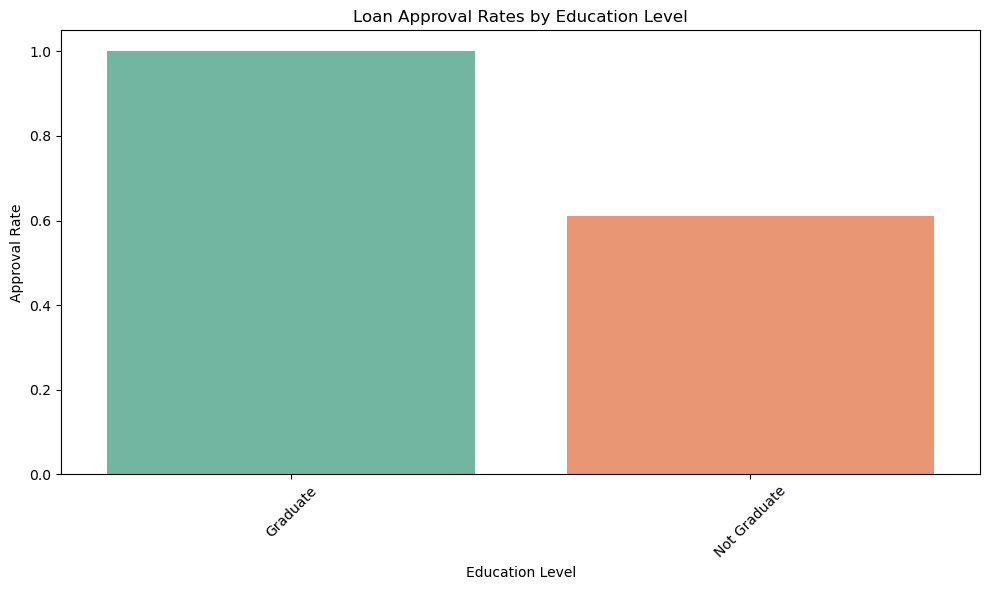

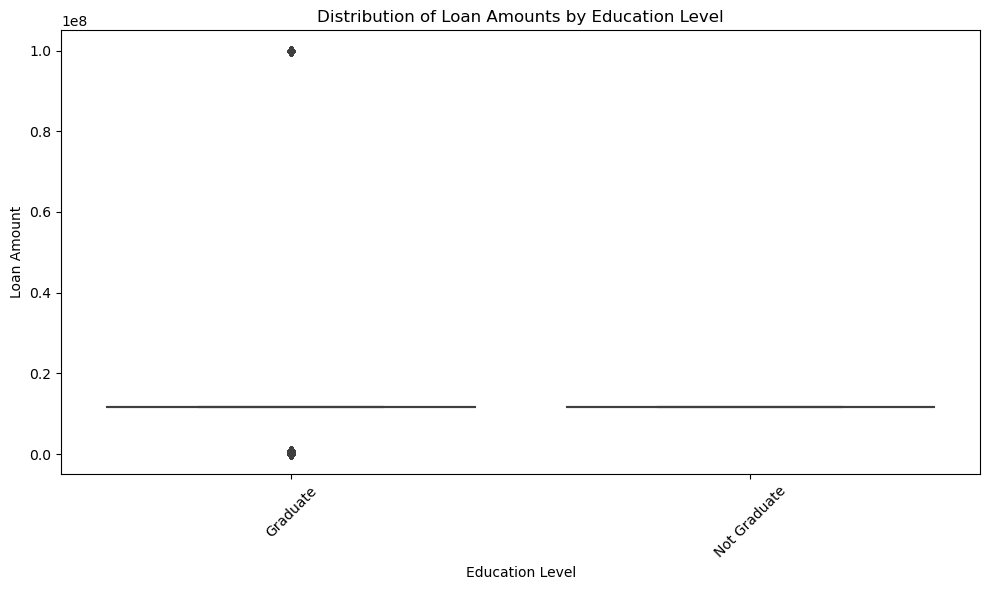

ANOVA Test for Differences in Loan Amounts based on Education Level:
F-Statistic: -5.53068869221014e-29
P-Value: nan


In [46]:
# 1. Association between Education and Loan Approval Rates
approval_rates = df.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack()
print("Approval Rates by Education Level:")
print(approval_rates)

# Visualize approval rates
plt.figure(figsize=(10, 6))
sns.barplot(x=approval_rates.index, y='Y', data=approval_rates, palette='Set2')
plt.xlabel('Education Level')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rates by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Differences in Loan Amounts based on Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Current Loan Amount', data=df)
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amounts by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical test for differences in loan amounts
from scipy.stats import f_oneway

education_levels = df['Education'].unique()
loan_amounts_by_education = [df[df['Education'] == level]['Current Loan Amount'] for level in education_levels]
f_statistic, p_value = f_oneway(*loan_amounts_by_education)

print("ANOVA Test for Differences in Loan Amounts based on Education Level:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Loan Repayment Analysis

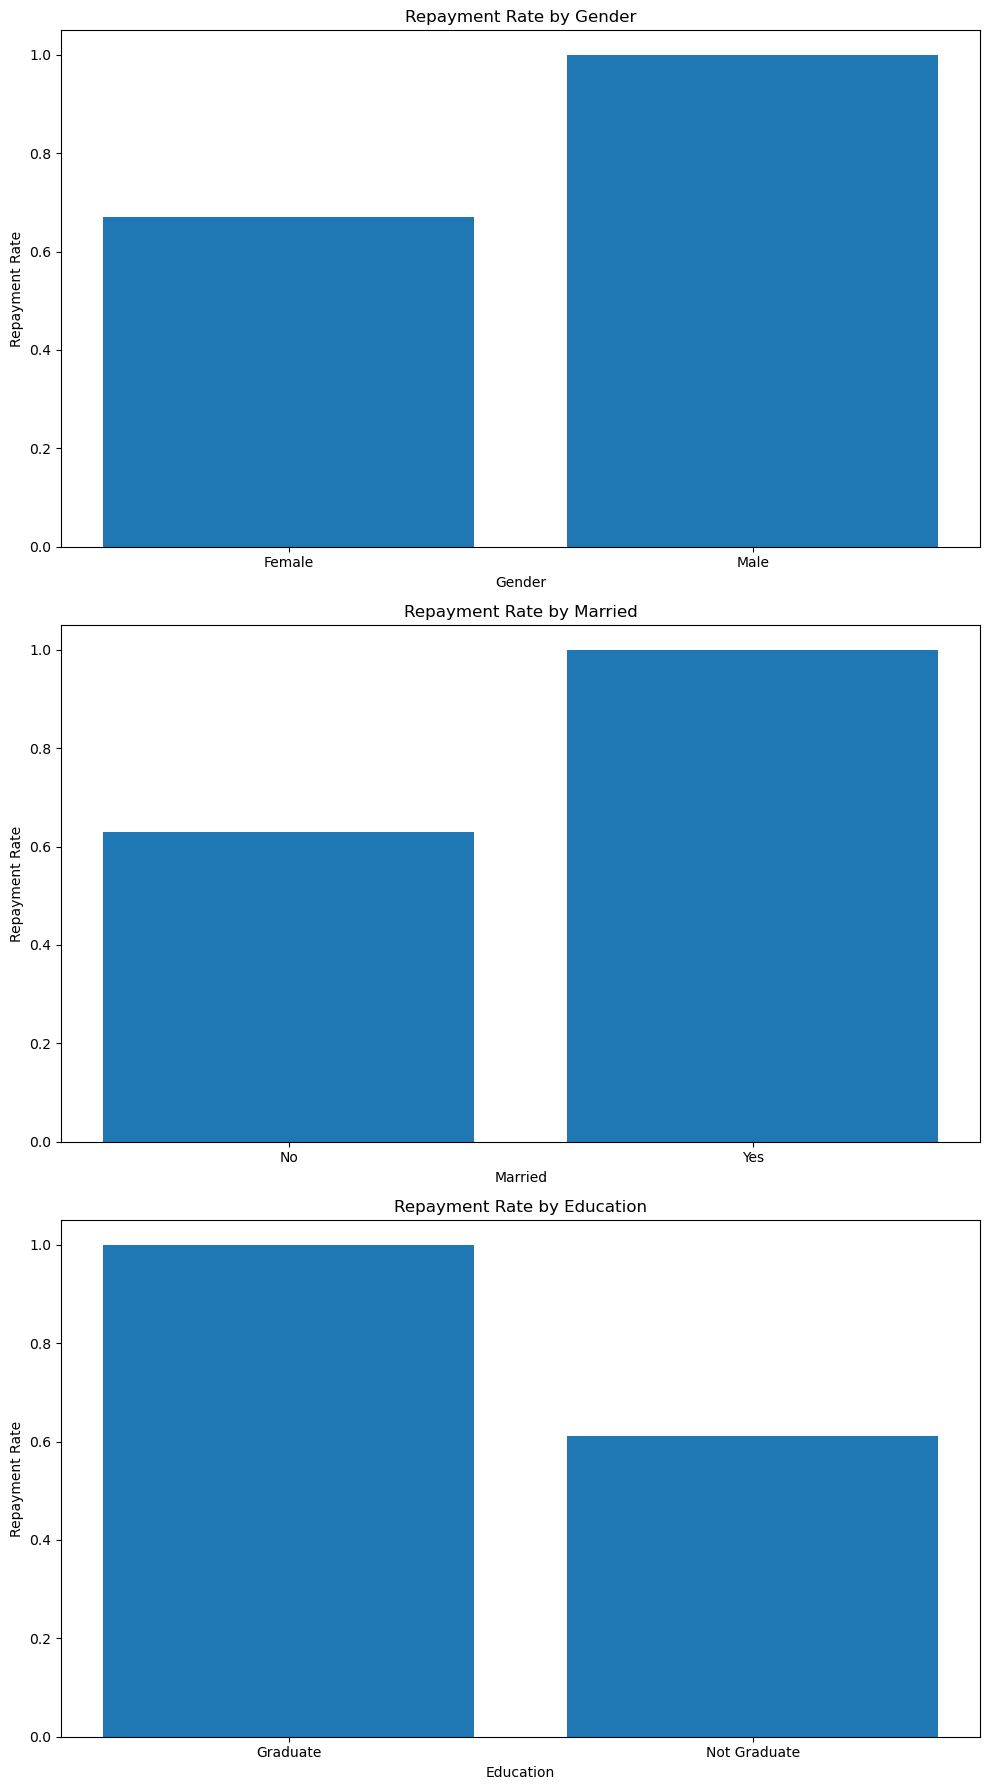

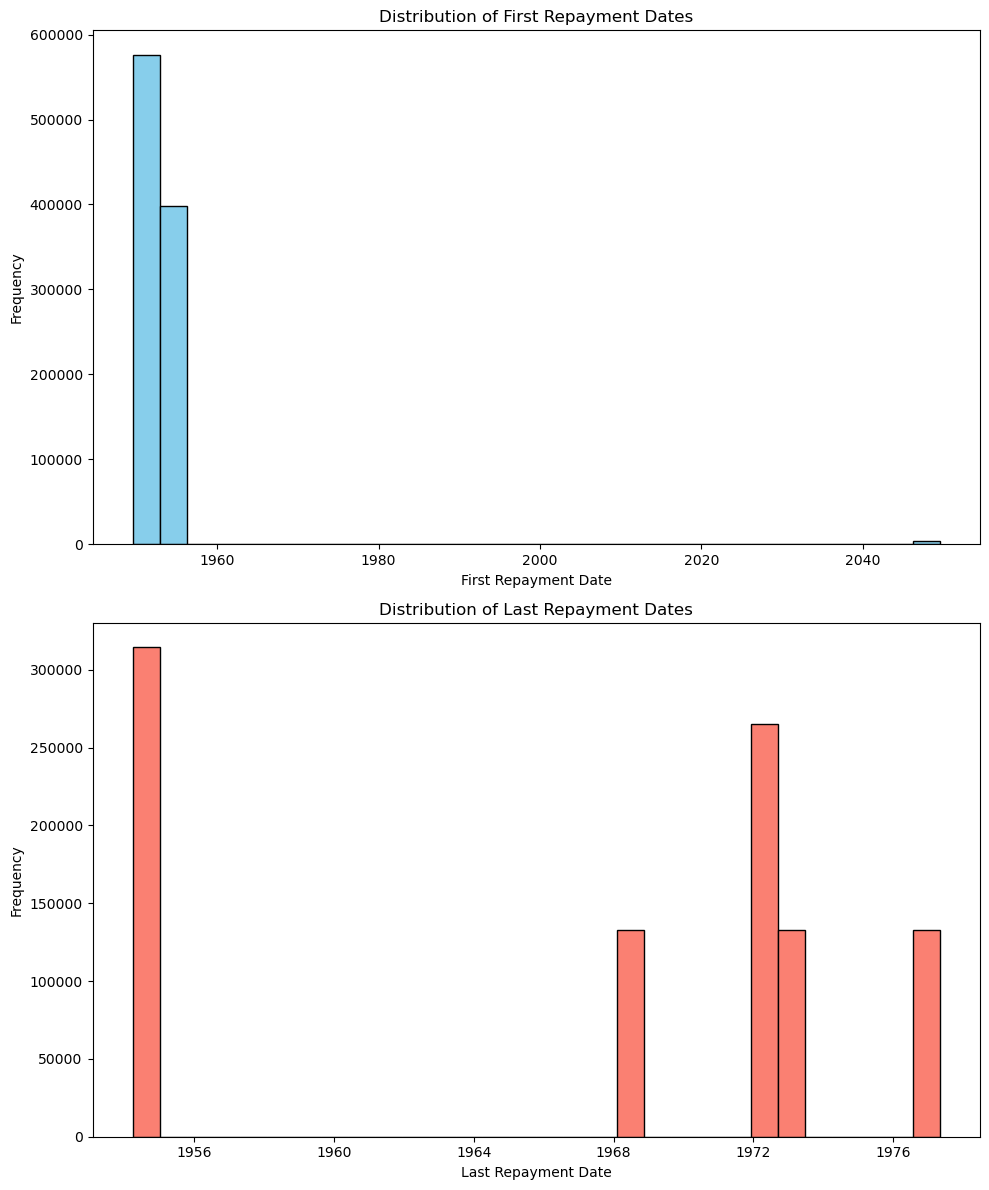

In [51]:
# Loan Repayment Behavior across Demographic Groups
def calculate_repayment_rate(group):
    fully_repaid_count = (group['Loan_Status'] == 'Y').sum()
    total_count = len(group)
    return fully_repaid_count / total_count

# Group the dataset by demographic features and calculate repayment rates
demographic_groups = ['Gender', 'Married', 'Education']  # Add more demographic features as needed
repayment_rates = {}
for group_feature in demographic_groups:
    group_repayment_rates = df.groupby(group_feature).apply(calculate_repayment_rate)
    repayment_rates[group_feature] = group_repayment_rates

# Plot the repayment rates for each demographic group
fig, axes = plt.subplots(len(demographic_groups), 1, figsize=(10, 6 * len(demographic_groups)))
for i, group_feature in enumerate(demographic_groups):
    ax = axes[i]
    ax.bar(repayment_rates[group_feature].index, repayment_rates[group_feature].values)
    ax.set_title(f'Repayment Rate by {group_feature}')
    ax.set_xlabel(group_feature)
    ax.set_ylabel('Repayment Rate')
plt.tight_layout()
plt.show()

# Patterns in Repayment Dates
# Assuming 'first_repayment_date' and 'last_repayment_date' are datetime columns
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of first repayment dates
axes[0].hist(df['first_repayment_date'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of First Repayment Dates')
axes[0].set_xlabel('First Repayment Date')
axes[0].set_ylabel('Frequency')

# Histogram of last repayment dates
axes[1].hist(df['last_repayment_date'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Last Repayment Dates')
axes[1].set_xlabel('Last Repayment Date')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



# Loan Characteristics Analysis

In [60]:
# Most Common Purposes for Taking Out a Loan
common_purposes = df['Purpose'].value_counts().head(10)
print("Most common purposes for taking out a loan:")
print(common_purposes)

# Differences in Loan Amounts Based on Purpose
loan_amounts_by_purpose = df.groupby('Purpose')['Current Loan Amount'].describe()
print("\nSummary statistics of loan amounts based on purpose:")
print(loan_amounts_by_purpose)

Most common purposes for taking out a loan:
Debt Consolidation    954044
other                   6598
Home Improvements       6432
Other                   3558
Business Loan           1732
Buy a Car               1407
Medical Bills           1240
Buy House                748
Take a Trip              617
major_purchase           404
Name: Purpose, dtype: int64

Summary statistics of loan amounts based on purpose:
                         count          mean           std      min  \
Purpose                                                               
Business Loan           1732.0  8.285255e+06  2.699430e+07  21978.0   
Buy House                748.0  1.072047e+07  3.048325e+07  22044.0   
Buy a Car               1407.0  1.451226e+07  3.501409e+07  21670.0   
Debt Consolidation    954044.0  1.175070e+07  9.572691e+06  15422.0   
Educational Expenses     113.0  1.252961e+07  3.303996e+07  19470.0   
Home Improvements       6432.0  1.234070e+07  3.247247e+07  21516.0   
Medical Bills   

# Income Distribution Analysis

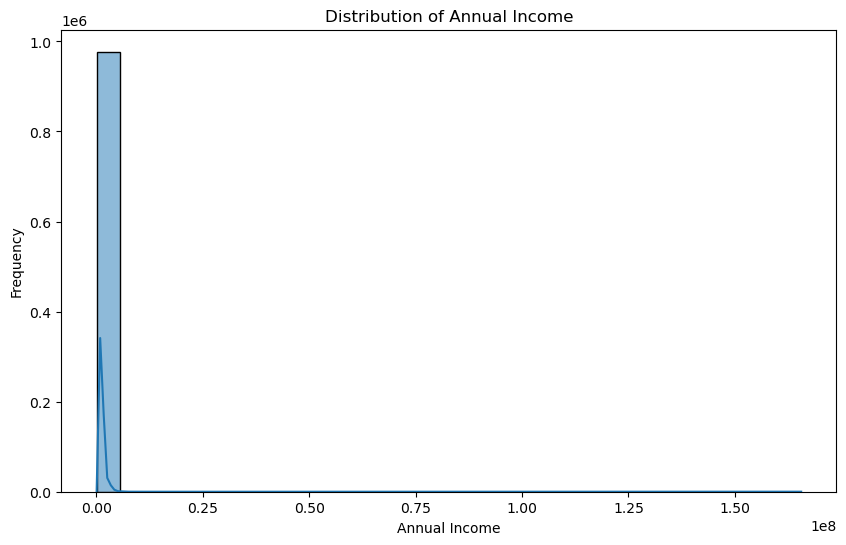

Summary Statistics for Annual Income:
count    9.776140e+05
mean     1.377449e+06
std      3.207659e+05
min      7.662700e+04
25%      1.377449e+06
50%      1.377449e+06
75%      1.377449e+06
max      1.655574e+08
Name: Annual Income, dtype: float64


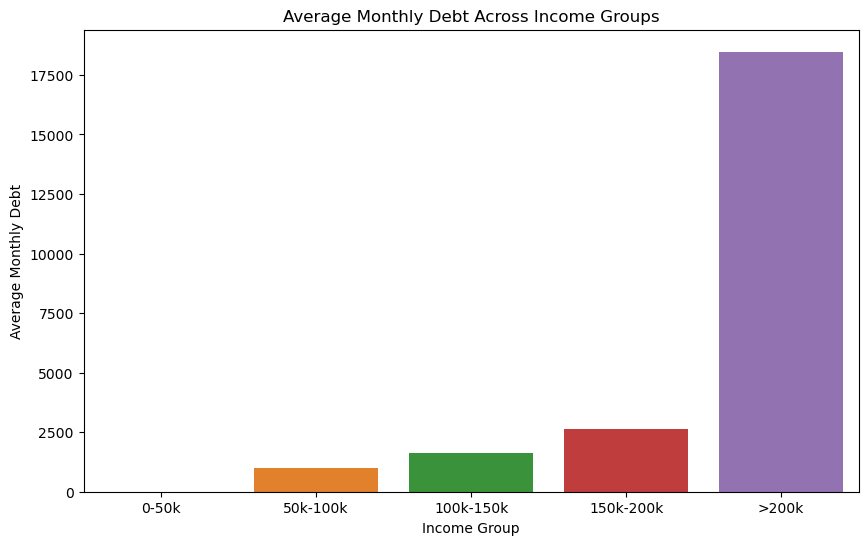

In [61]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for Annual Income
income_stats = df['Annual Income'].describe()
print("Summary Statistics for Annual Income:")
print(income_stats)

# Comparison of Monthly Debt Across Income Groups
# Define income groups
income_bins = [0, 50000, 100000, 150000, 200000, df['Annual Income'].max()]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
df['Income Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Calculate average monthly debt for each income group
monthly_debt_by_income = df.groupby('Income Group')['Monthly Debt'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_debt_by_income, x='Income Group', y='Monthly Debt')
plt.title('Average Monthly Debt Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Average Monthly Debt')
plt.show()